### Hypothesis Testing
In this lesson we are tackling the problem of whether the occurance of an event is random or has an underlying cause. A good example is when a basketball makes 4 3-pointers in a row. Or, we make a change in a website and make more sales in the next hour. Is that because of the change, or is it just a random variation? Or, we survey prospective votes and one candidate is getting 2% more than the other. Is that sampling error or a reliable voting trend?

We’ve generated random samples from a population with a given population mean. We are going to look at how the means of different samples can vary within the same population.

In [22]:
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind
from matplotlib import pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import f_oneway



# read a file and output it so that it can be copied and pasted into file for jupyter to use
# import sys
# name = 'week2'
# with open(name+'.csv') as f:
#   for x in f:
#     sys.stdout.write('{}'.format(x))

In [2]:


population = np.random.normal(loc=65, scale=3.5, size=300)
population_mean = np.mean(population)

print("Population Mean: {}".format(population_mean))

sample_1 = np.random.choice(population, size=30, replace=False)
sample_2 = np.random.choice(population, size=30, replace=False)
sample_3 = np.random.choice(population, size=30, replace=False)
sample_4 = np.random.choice(population, size=30, replace=False)
sample_5 = np.random.choice(population, size=30, replace=False)

sample_1_mean = np.mean(sample_1)
print("Sample 1 Mean: {}".format(sample_1_mean))

sample_2_mean = np.mean(sample_2)
sample_3_mean = np.mean(sample_3)
sample_4_mean = np.mean(sample_4)
sample_5_mean = np.mean(sample_5)

print("Sample 2 Mean: {}".format(sample_2_mean))
print("Sample 3 Mean: {}".format(sample_3_mean))
print("Sample 4 Mean: {}".format(sample_4_mean))
print("Sample 5 Mean: {}".format(sample_5_mean))

Population Mean: 64.87679022495132
Sample 1 Mean: 65.79509100665993
Sample 2 Mean: 64.96327772167622
Sample 3 Mean: 65.35100927672997
Sample 4 Mean: 64.37749235931001
Sample 5 Mean: 64.11271535850175


In [4]:
# Central Limit Theorem says that as the sample size increases the pop stats proceed to a limit
# This example increases the size of the sample to demonstrate
# Create population and find population mean
population = np.random.normal(loc=65, scale=100, size=3000)
population_mean = np.mean(population)

# Select increasingly larger samples
extra_small_sample = population[:10]
small_sample = population[:50]
medium_sample = population[:100]
large_sample = population[:500]
extra_large_sample = population[:1000]

# Calculate the mean of those samples
extra_small_sample_mean = np.mean(extra_small_sample)
small_sample_mean = np.mean(small_sample)
medium_sample_mean = np.mean(medium_sample)
large_sample_mean = np.mean(large_sample)
extra_large_sample_mean = np.mean(extra_large_sample)

# Print them all out!
print("Extra Small Sample Mean: {}".format(extra_small_sample_mean))
print("Small Sample Mean: {}".format(small_sample_mean))
print("Medium Sample Mean: {}".format(medium_sample_mean))
print("Large Sample Mean: {}".format(large_sample_mean))
print("Extra Large Sample Mean: {}".format(extra_large_sample_mean))

print("\nPopulation Mean: {}".format(population_mean))

Extra Small Sample Mean: 128.9675053478923
Small Sample Mean: 66.74617696441976
Medium Sample Mean: 66.43708905813897
Large Sample Mean: 61.712715932255904
Extra Large Sample Mean: 61.992475720915984

Population Mean: 61.66116674088095


### Hypothesis Tests
When observing differences in data, a data analyst understands the possibility that these differences could be the result of random chance.

Suppose we want to know if men are more likely to sign up for a given programming class than women. We invite 100 men and 100 women to this class. After one week, 34 women sign up, and 39 men sign up. More men than women signed up, but is this a “real” difference?

We have taken sample means from two different populations, men and women. We want to know if the difference that we observe in these sample means reflects a difference in the population means. To formally answer this question, we need to re-frame it in terms of probability:

“What is the probability that men and women have the same level of interest in this class and that the difference we observed is just chance?”

In other words, “If we gave the same invitation to every person in the world, would more men still sign up?”

A more formal version is: “What is the probability that the two population means are the same and that the difference we observed in the sample means is just chance?”
m
These statements are all ways of expressing a null hypothesis. A null hypothesis is a statement that the observed difference is the result of chance.

Hypothesis testing is a mathematical way of determining whether we can be confident that the null hypothesis is false. Different situations will require different types of hypothesis testing

### Type 1 and Type II Errors
Type I error is a false positive when a correlation is found between things that are not related. Or, when the null hypothesis is rejected but actually true. Vaccine works when actually it has no efficacy. Null test: #vaccinated who don't get sick = #unvaccinated who don't get sick. When this null test is rejected, ie. we think the medicine worked, they we have a false positive, the medicine works.

Does regeneron work? That is, when Trump tested positive for Covid he took regeneron and got better. This is a false positive: regeneron works, if actually it was a random event. The only way to know is to have larger sample of covid positive people and give some of them regeneron and not give some to the others. If the mean of the two samples is the same, then giving regeneron has no effect. How large does the sample have to be? The means have to be outside each other's std deviation, the more the better. Tstad deviation will decrease as the sample size grows. The null hypothesi is mean(regeneron) - mean(no regeneron) = 0.

Type I error is a false negative, The null hypothesis is accepted when actually it is false. A correlation between two variable is not found when one actually exists.


In [10]:
def intersect(list1, list2):
  return [sample for sample in list1 if sample in list2]

# the true positives and negatives:
actual_positive = [2, 5, 6, 7, 8, 10, 18, 21, 24, 25, 29, 30, 32, 33, 38, \
                   39, 42, 44, 45, 47]
actual_negative = [1, 3, 4, 9, 11, 12, 13, 14, 15, 16, 17, 19, 20, 22, 23, \
                   26, 27, 28, 31, 34, 35, 36, 37, 40, 41, 43, 46, 48, 49]

# the positives and negatives we determine by running the experiment:
experimental_positive = [2, 4, 5, 7, 8, 9, 10, 11, 13, 15, 16, 17, 18, 19, 20, \
                         21, 22, 24, 26, 27, 28, 32, 35, 36, 38, 39, 40, 45, 46, 49]
experimental_negative = [1, 3, 6, 12, 14, 23, 25, 29, 30, 31, 33, 34, 37, 41, \
                         42, 43, 44, 47, 48]

# False positives: expts predicted positive results when they were actually negative
type_i_errors = intersect(actual_negative, experimental_positive)
print(type_i_errors)

# False negatives: expts predicted negative results when they should have been positive
type_ii_errors = intersect(actual_positive, experimental_negative)
print(type_ii_errors)

[4, 9, 11, 13, 15, 16, 17, 19, 20, 22, 26, 27, 28, 35, 36, 40, 46, 49]
[6, 25, 29, 30, 33, 42, 44, 47]


### P-Values
We have discussed how a hypothesis test is used to determine the validity of a null hypothesis. A hypothesis test provides a numerical answer, called a p-value, that helps us decide how confident we can be in the result. In this context, a p-value is the probability that we yield the observed statistics under the assumption that the null hypothesis is true.

A p-value of 0.05 means that if the null hypothesis is true, there is a 5% chance that an observed sample statistic could have occurred due to random sampling error. For example, in comparing two sample means, a p-value of 0.05 indicates there is a 5% chance that the observed difference in sample means occurred by random chance, even though the population means are equal.

Before conducting a hypothesis test, we determine the necessary threshold we would need before concluding that the results are significant. A higher threshold is more likely to give a false positive so if we want to be very sure that the result is not due to just chance, we will select a very small threshold.

It is important that we choose the significance level before we perform our statistical hypothesis tests to yield a p-value. If we wait until after we see the results, we might pick our threshold such that we get the result we want to see. For instance, if we’re trying to publish our results, we might set a significance level that makes our results seem statistically significant. Choosing our significance level in advance helps keep us honest.

Generally, we want a p-value of less than 0.05, meaning that there is less than a 5% chance that our results are due to random chance.

In [12]:
# Reject null hypothesis

def reject_null_hypothesis(p_value):
    """
    Returns the truthiness of whether the null hypothesis can be rejected

    Takes a p-value as its input and assumes p <= 0.05 is significant
    """
    result = p_value<=0.05
    print('For p_value', p_value, 'Null hypothesis is:', result)
    return result

hypothesis_tests = [0.1, 0.009, 0.051, 0.012, 0.37, 0.6, 0.11, 0.025, 0.0499, 0.0001]

for p_value in hypothesis_tests:
    reject_null_hypothesis(p_value)


For p_value 0.1 Null hypothesis is: False
For p_value 0.009 Null hypothesis is: True
For p_value 0.051 Null hypothesis is: False
For p_value 0.012 Null hypothesis is: True
For p_value 0.37 Null hypothesis is: False
For p_value 0.6 Null hypothesis is: False
For p_value 0.11 Null hypothesis is: False
For p_value 0.025 Null hypothesis is: True
For p_value 0.0499 Null hypothesis is: True
For p_value 0.0001 Null hypothesis is: True


### 1 Sample T-Testing
Let’s imagine the fictional business BuyPie, which sends ingredients for pies to your household so that you can make them from scratch. Suppose that a product manager wants online BuyPie orders to cost around 1000 Rupees on average. In the past day, 50 people made an online purchase and the average payment per order was only 850 Rupees. Are people really spending less than 1000 Rupees on average? Or is this just the result of chance and a small sample size?

We can test this using a 1 Sample T Test, which compares a sample mean to a hypothetical population mean.

When we conduct a 1 Sample T Test, we want to first create a null hypothesis, which is a prediction that the observed sample comes from a population with a particular mean. For example: “the average cost of a BuyPie order is 1000 Rupees”. Note that, even if the null hypothesis were true, it’s very unlikely that any observed sample mean will be exactly 1000.00 Rupees.

We also have to determine an alternative hypothesis, which is a statement about the kind of difference we are interested in. For example, we might form the following alternative hypothesis: “The average cost of a BuyPie order is not 1000 Rupees”.

If we form the null and alternative tests as indicated above, the test asks the following question: “Suppose that that the average cost of a BuyPie order is 1000 Rupees; what is the probability of observing a sample of 50 orders with cost as different or more different from 1000 as we did (i.e., < 850 or > 1150)?”

The result of the test is a p-value. If the p-value is less than our pre-chosen threshold (usually .05), we can reject the null hypothesis in favor of the alternative. When we reject the null, we are saying that it would be unlikely to observe our sample (or something more extreme) if the null hypothesis were true.

It is important to note that we cannot conclude anything about magnitude of differences based on this test; for example, we might conclude that it is unlikely that the average cost of all BuyPie orders is 1000 Rupees; however, we cannot then conclude that the average cost is closer to 850 Rupees.

SciPy has a function called ttest_1samp, which performs a 1 Sample T-Test for you.

ttest_1samp requires two inputs, a sample distribution (eg. the list of the 50 observed purchase prices) and a mean to test against (eg. 1000):

tstat, pval = ttest_1samp(example_distribution, expected_mean)
print pval
It also returns two outputs: the t-statistic (which we won’t cover in this course), and the p-value — telling us how confident we can be that the sample of values came from a distribution with the specified mean.

In [85]:

prices = np.genfromtxt("prices.csv")
print(prices)

prices_mean = np.mean(prices)
print('Prices mean:', prices_mean)
prices_std  = np.std(prices)
print(prices_std)

expected_mean = 1000
tstat, pval = ttest_1samp(prices, expected_mean)

print('pval: ', pval)
print(f'Shows that sample has a {round(100*pval)}% chance of being randomly drawn from population with mean={expected_mean}')

[ 978. 1080.  999.  855. 1105.  961.  899. 1061.  880. 1455.  505.  936.
 1024.  982.]
Prices mean: 980.0
192.76632782427833
pval:  0.7143713930133531
Shows that sample has a 71.0% chance of being randomly drawn from population with mean=1000


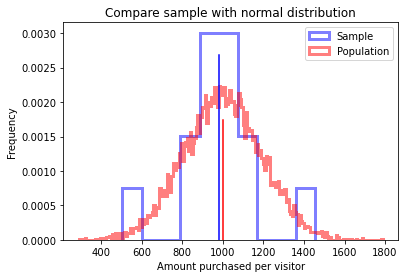

In [101]:
# Compare the sample to a random population with expected_mean
pop = np.random.normal(expected_mean, prices_std, 10000)
plt.hist(prices, histtype='step', density=True, label='Sample', color='blue', linewidth=3, alpha=.5)
plt.axvline(prices_mean, ymax=.85, color='blue')
plt.hist(pop, histtype='step', density=True, label='Population', color='red', linewidth=3, alpha=.5, bins=200)
plt.axvline(expected_mean, ymax=.55, color='red')

plt.title('Compare sample with normal distribution')
plt.xlabel('Amount purchased per visitor')
plt.ylabel('Frequency')
plt.legend()

plt.show()

### One Sample T-Test II
In the last exercise, we got a p-value that was much higher than 0.05, so we cannot reject the null hypothesis. If we conduct another experiment and take a new sample of orders, will we get the same result? Not necessarily!

Just because we don’t have enough data to detect a difference doesn’t mean that there isn’t one. Generally, the larger the sample(s) we have, the smaller a difference we’ll be able to detect. You can learn more about the exact relationship between sample size and detectable differences in the Sample Size Determination course.

It’s also possible that the true mean order price really is 1000 Rupees, but a single sample still leads us to incorrectly reject the null hypothesis. Remember that this is called Type 1 Error and the significance threshold we use for our test should be equal to the type 1 error rate under the null hypothesis. In other words, if we set a 0.05 significance threshold and the true mean purchase price is truly 1000 Rupees, we still expect to incorrectly reject the null (and say that the mean is not 1000 Rupees) in 5% of experiments.

To build intuition for the limitations of conclusions based on any individual sample, let’s explore some more data from BuyPie.com and see whether we consistently observe the same results.

In [44]:
incorrect_results = 0 # Start the counter at 0

daily_prices = np.genfromtxt("daily_prices.csv", delimiter=",")

expected_mean = 1000

for i in range(1000): # 1000 experiments
    #your ttest here:
    tstat, pval = ttest_1samp(daily_prices[i], expected_mean)
    #print the pvalue here:
#     print(pval)
    if pval<=0.05:
        incorrect_results += 1

  
print("We incorrectly thought that the distribution was different in " + str(incorrect_results) + " out of 1000 experiments.")

# We get 55. Our prediction is expected to be correct within 0.05, or about 50 of the samples. That's close.

We incorrectly thought that the distribution was different in 55 out of 1000 experiments.


### 2 Sample T-Test
Suppose that a company has recently updated their website to make it more colorful and inviting. The company wants to know whether the new design is resulting in visitors staying on the site for a longer period of time. A sample of 100 visitors who saw the old design spent an average of 25 minutes on the site. A second sample of 100 visitors who saw the new version spent an average of 28 minutes on the site. Did the average time spent per visitor vary across groups? Or is this difference attributable to random chance?

One way of testing whether this difference is significant is by using a 2 Sample T-Test. A 2 Sample T-Test compares two sets of numerical data.

The null hypothesis of a 2 Sample T-Test is that the two observed samples come from populations with the same mean. In the example above, this means: if we could observe all site visitors in two alternate universes (one where they see each version of the site), the average visiting times in these universes would be equal.

The alternative hypothesis could be: The two observed samples come from populations with different means. In the example above, this would mean that the average visiting times in our two alternate universes are actually different, hence why we observed a difference in our samples.

We can use SciPy’s ttest_ind function to perform a 2 Sample T-Test. It takes the two samples as inputs and returns the t-statistic and a p-value, which we can use to assess the probability of an observed difference happening by chance if the null hypothesis were true. For more information about p-values, refer to the earlier exercise on univariate t-tests.

In [ ]:
# read a file and output it so that it can be copied and pasted into file for jupyter to use
# import sys
# name = 'week2'
# with open(name+'.csv') as f:
#   for x in f:
#     sys.stdout.write('{}'.format(x))

In [45]:
week1 = np.genfromtxt("week1.csv",  delimiter=",")
week2 = np.genfromtxt("week2.csv",  delimiter=",")

In [49]:
# compute and store the means
week1_mean = np.mean(week1)
week2_mean = np.mean(week2)
print('Week 1 mean:', week1_mean)
print('Week 2 mean:', week2_mean)

Week 1 mean: 25.448059395144654
Week 2 mean: 29.021568107746155


In [51]:
# find std dev
week1_std = np.std(week1)
week2_std = np.std(week2)
print('Std 1:', week1_std)
print('Std 2:', week2_std)

Std 1: 4.531693387084315
Std 2: 5.497966708653651


In [87]:
# Use 2 Samle T-test to see if the two distributions could have the same mean

tstat, pval = ttest_ind(week1, week2)
print('pval:', pval)
if pval<=.05:
    print("Reject hypothesis that the sample populations have the same mean.")
else:
    print('Accept hypothesis that the sample populations the same mean.')

pval: 0.0006767676900067757
Reject hypothesis that the sample populations have the same mean.


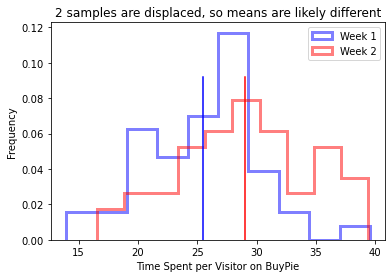

In [76]:
# plot histos of the 2 samples to take a look for confirmation
plt.hist(week1, histtype='step', density=True, label='Week 1', color='blue', linewidth=3, alpha=.5)
plt.axvline(week1_mean, ymax=.75, color='blue')
plt.hist(week2, histtype='step', density=True, label='Week 2', color='red', linewidth=3, alpha=.5)
plt.axvline(week2_mean, ymax=.75, color='red')

plt.title('2 samples are displaced, so means are likely different')
plt.xlabel('Time Spent per Visitor on BuyPie')
plt.ylabel('Frequency')
plt.legend()

plt.show()

### Dangers of Multiple T-Tests
Suppose that we own a chain of stores that sell ants, called VeryAnts. There are three different locations: A, B, and C. We want to know if the average ant sales over the past year are significantly different between the three locations.

At first, it seems that we could perform t-tests between each pair of stores.

We know that the p-value is the probability that we incorrectly reject the null hypothesis on each t-test. The more t-tests we perform, the more likely that we are to get a false positive, a Type I error.

For a significance threshold of 0.05, if the null hypothesis is true, then the probability of correctly failing to reject the null is 1 – 0.05 = 0.95. When we run another t-test where the null is true, the probability of correctly failing to reject the null on both of those tests is 0.95 * 0.95, or 0.9025. That means our probability of making an error is now 1 - 0.9025, or close to 10%! This error probability only gets bigger with the more t-tests we do. 

In [90]:
a = np.genfromtxt("store_a.csv",  delimiter=",")
b = np.genfromtxt("store_b.csv",  delimiter=",")
c = np.genfromtxt("store_c.csv",  delimiter=",")
a_mean = np.mean(a)
b_mean = np.mean(b)
c_mean = np.mean(c)
print(a_mean, b_mean, c_mean)
a_std = np.std(a)
b_std = np.std(b)
c_std = np.std(c)
print(a_std, b_std, c_std)


58.34963608404818 65.62628713559894 62.36117318586781


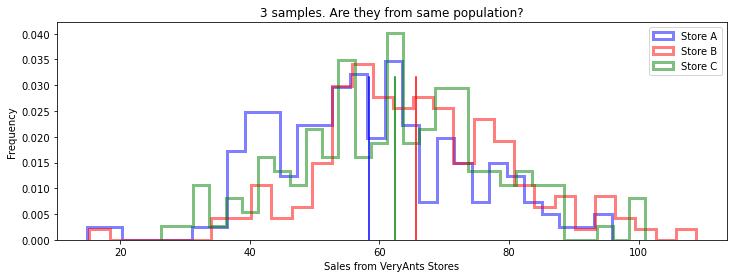

In [109]:
plt.figure(figsize=(12,4))
plt.hist(a, histtype='step', density=True, label='Store A', color='blue', linewidth=3, alpha=.5, bins=30)
plt.axvline(a_mean, ymax=.75, color='blue')
plt.hist(b, histtype='step', density=True, label='Store B', color='red', linewidth=3, alpha=.5, bins=30)
plt.axvline(b_mean, ymax=.75, color='red')
plt.hist(c, histtype='step', density=True, label='Store C', color='green', linewidth=3, alpha=.5, bins=30)
plt.axvline(c_mean, ymax=.75, color='green')

plt.title('3 samples. Are they from same population?')
plt.xlabel('Sales from VeryAnts Stores')
plt.ylabel('Frequency')
plt.legend()

plt.show()

In [102]:
# Perform T-tests between pairs of samples
a_b_tstat, a_b_pval = ttest_ind(a, b)
a_c_tstat, a_c_pval = ttest_ind(a, c)
b_c_tstat, b_c_pval = ttest_ind(b, c)
print(a_b_pval, a_c_pval, b_c_pval)

2.7667629398748514e-05 0.021012051698577176 0.059885635239664836


In [113]:
# Store the probability of error in a variable called error_prob.
# Hint:For one t-test, the probability of making an error is 1-0.95. 
# For two t-tests, it is 1-0.95**2. what would it be for three t-tests?

# There's a 95% chance that accepting the hypothesis is correct. If there are three
# 3 samples where the hypothesis is accepted, there's a 0.95*0.95*0.95 chance 
# the conclusion is correct, or 1 -.95**3 that's the conclusion is wrong.

error_prob = ( 1- 0.95**3)
print(error_prob)

0.1426250000000001


### ANOVA
In the last exercise, we saw that the probability of making a Type I error got dangerously high as we performed more t-tests.

When comparing more than two numerical datasets, one way to preserve a Type I error probability of 0.05 is to use ANOVA. ANOVA (Analysis of Variance) tests the null hypothesis that all of the samples come from populations with the same mean. If we reject the null hypothesis with ANOVA, we’re saying that at least one pair of populations (from which the samples were drawn) have different means; however, we cannot determine exactly which pair(s).

We can use the SciPy function f_oneway to perform ANOVA on multiple datasets. f_oneway takes in each dataset as a different input and returns the F-statistic and the p-value. For example, if we were comparing scores on a videogame between math majors, writing majors, and psychology majors, we could run an ANOVA test with this line:

fstat, pval = f_oneway(scores_mathematicians, scores_writers, scores_psychologists)
The null hypothesis, in this case, is that all three populations have the same mean score on this videogame. If we reject this null hypothesis (if we get a p-value less than 0.05), we can say that we are reasonably confident that at least one pair of populations is significantly different. After using only ANOVA, we can’t make any conclusions on which two populations have a significant difference.

In [117]:
# from scipy.stats import f_oneway

fstat, pval = f_oneway(a, b, c)
print(pval)
if pval<=0.05:
    print(f'There\'s a {round(100-pval*100)}% chance that at least one of the samples has a different mean')
else:
    print(f'There\'s ) {round(pval*100)}% chance the samples have the same mean')

0.0001534116600777967
There's a 100.0% chance that at least one of the samples has a different mean


In [120]:
# Change store_b's sample and rerun
# The new sample results from a large increase in sales. This should decrease 
# the pvalue because the sample's even more unlike the other stores.

a = np.genfromtxt("store_a.csv",  delimiter=",")
b = np.genfromtxt("store_b_new.csv",  delimiter=",")
c = np.genfromtxt("store_c.csv",  delimiter=",")
a_mean = np.mean(a)
b_mean = np.mean(b)
c_mean = np.mean(c)
print(a_mean, b_mean, c_mean)
a_std = np.std(a)
b_std = np.std(b)
c_std = np.std(c)
print(a_std, b_std, c_std)
fstat, pval = f_oneway(a, b, c)
print(f'pvalue: {pval}')
if pval<=0.05:
    print(f'There\'s a {round(100-pval*100)}% chance that at least one of the samples has a different mean')
else:
    print(f'There\'s ) {round(pval*100)}% chance the samples have the same mean')

58.34963608404818 148.35494018607827 62.36117318586781
14.753704052338916 13.961928490770205 15.092458510897417
pvalue: 8.49989098083282e-215
There's a 100.0% chance that at least one of the samples has a different mean


### Assumptions of T-Tests and ANOVA
Before we use one or two sample t-tests or ANOVA, we need to be sure that the following things are true:

1. The sample(s) should be normally distributed…ish
Data analysts in the real world often still perform t-tests or ANOVAs on data that are not normally distributed. This is usually not a problem if sample size is large, but it depends on how non-normal the data is. In general, the bigger the sample size, the safer you are!

2. The standard deviations of the samples should be equal
For ANOVA and 2-Sample T-Tests, using datasets with standard deviations that are significantly different from each other will often obscure the differences in group means. That said, there is also a way to run a 2-Sample T-Test without assuming equal standard deviations (for example, by setting the equal_var parameter in the scipy.stats.ttest_ind() function equal to False). Running the test in this way has some disadvantages (it essentially makes it harder to reject the null hypothesis even when there is a true difference between groups), so it’s important to check for equal standard deviations before running a test.

To check this assumption, it is normally sufficient to divide the two standard deviations and see if the ratio is “close enough” to 1. “Close enough” may differ in different contexts but generally staying within 10% should suffice. This equates to a ratio between 0.9 and 1.1.

3. The samples must be independent
When comparing two or more datasets, the values in one distribution should not affect the values in another distribution. In other words, knowing more about one distribution should not give you any information about any other distribution.

Here are some examples where it would seem the samples are not independent:

- the number of goals scored per soccer player before, during, and after undergoing a rigorous training regimen
- a group of patients’ blood pressure levels before, during, and after the administration of a drug

It is important to understand your datasets before you begin conducting hypothesis tests on them so that you know you are choosing the right test.

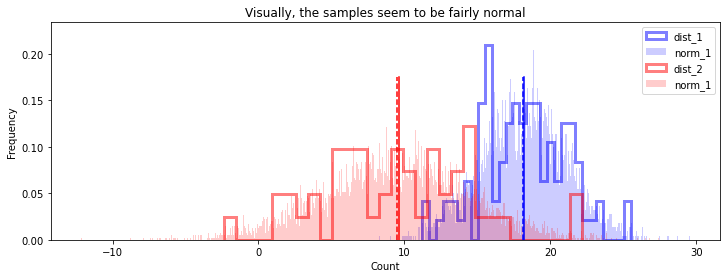

In [138]:
def do(a):
    m = np.mean(a)
    s = np.std(a)
    return [np.median(a), m, s, np.random.normal(m, s, 10000)]

dist_1 = np.genfromtxt("1.csv",  delimiter=",")
[md1, m1, s1, norm1] = do(dist_1)

dist_2 = np.genfromtxt("2.csv",  delimiter=",")
[md2, m2, s2, norm2] = do(dist_2)

#plot your histogram here
plt.figure(figsize=(12,4))

plt.hist(dist_1, histtype='step', density=True, label='dist_1', color='blue', linewidth=3, alpha=.5, bins=30)
plt.axvline(md1, ymax=.75, color='blue')
plt.axvline(m1, ymax=.75, color='blue', linestyle='--')

# plt.hist(norm1, histtype='step', density=True, label='norm_1', color='blue', alpha=.2, bins=1000)
plt.hist(norm1, density=True, label='norm_1', color='blue', alpha=.2, bins=1000)

plt.hist(dist_2, histtype='step', density=True, label='dist_2', color='red', linewidth=3, alpha=.5, bins=30)
plt.axvline(md2, ymax=.75, color='red')
plt.axvline(m2, ymax=.75, color='red', linestyle='--')

# plt.hist(norm2, histtype='step', density=True, label='norm_1', color='red', alpha=.2, bins=1000)
plt.hist(norm2, density=True, label='norm_1', color='red', alpha=.2, bins=1000)

plt.title('Visually, the samples seem to be fairly normal')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.legend()

plt.show()



In [125]:
# Calculate the ratio of std deviations for the two samples. If they are in [.9, 1.1]
# then ANOVA is reasonably used

dist1Std = np.std(dist_1)
dist2Std = np.std(dist_2)
ratio = dist1Std/dist2Std
print(ratio)
if ratio>=.9 and ratio <=1.1:
    print(f'Ratio of std, {round(ratio)}, is close enough for ANOVA to be used.')
else:
    print(f'Ratio of std, {round(ratio)}, is NOT close enough for ANOVA to be used.')


0.5814221080397466
Ratio of std, 1.0, is NOT close enough for ANOVA to be used.


### Tukey's Range Test
Let’s say that we have performed ANOVA to compare three sets of data from the three VeryAnts stores. We received the result that there is some significant difference between datasets.

Now, we have to find out which datasets are different.

We can perform a Tukey’s Range Test to determine the difference between datasets.

If we feed in three datasets, such as the sales at the VeryAnts store locations A, B, and C, Tukey’s Test can tell us which pairs of locations are distinguishable from each other.

The function to perform Tukey’s Range Test is pairwise_tukeyhsd, which is found in statsmodel, not scipy. We have to provide the function with one list of all of the data and a list of labels that tell the function which elements of the list are from which set. We also provide the significance level we want, which is usually 0.05.

For example, if we were looking to compare mean scores of movies that are dramas, comedies, or documentaries, we would make a call to pairwise_tukeyhsd like this:

```
movie_scores = np.concatenate([drama_scores, comedy_scores, documentary_scores])
labels = ['drama'] * len(drama_scores) + ['comedy'] * len(comedy_scores) + ['documentary'] * len(documentary_scores)
tukey_results = pairwise_tukeyhsd(movie_scores, labels, 0.05)
```

It will return a table of information, telling you whether or not to reject the null hypothesis for each pair of datasets.

In [149]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd as tukey

a = np.genfromtxt("store_a.csv",  delimiter=",")
b = np.genfromtxt("store_b.csv",  delimiter=",")
c = np.genfromtxt("store_c.csv",  delimiter=",")

stat, pval = f_oneway(a, b, c)
print(pval)

# Using our data from ANOVA, we create v and labels
v = np.concatenate([a, b, c])
labels = ['a'] * len(a) + ['b'] * len(b) + ['c'] * len(c)

# tukey_results = pairwise_tukeyhsd(v, labels, 0.05)
tukey_results = tukey(v, labels, 0.05)

print(tukey_results)

0.0001534116600777967
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     a      b   7.2767  0.001  3.2266 11.3267   True
     a      c   4.0115 0.0529 -0.0385  8.0616  False
     b      c  -3.2651 0.1411 -7.3152  0.7849  False
----------------------------------------------------


The test rejects hypotheses that a and b have same mean because p-adj<=0.05. The other two hypotheses, that a-c an b-c have the same mean is accepted because p-adj>0.05. 

### Binomial Test
Let’s imagine that we are analyzing the percentage of customers who make a purchase after visiting a website. 1000 customers visited the site this month, and 58 of them made a purchase. The marketing department reports that historical data suggests about 72 of every 1000 visitors make a purchase. Thus, they estimate that the probability of any particular customer making a purchase is 7.2%. We would like to know if this month’s number, 58 purchases, is significantly different from normal or a reasonable fluctuation due to random chance.

In previous exercises, we collected samples of numerical information (eg. order price) and then used the mean and standard deviation of those samples to make comparisons. In contrast, we now have a sample where each unit (a visitor) falls into one of two discrete categories:

- “made a purchase”
- “did not make a purchase”

Instead of comparing sample means, we want to compare the percent in the “made a purchase” category to some expectation. This can be done with a Binomial Test. The binomial distribution describes the number of expected “successes” in an experiment with some number of “trials”. In this case, our experiment consists of 1000 people visiting the site. For each of those trials (visitors), we expect that there is a 7.2% chance of a purchase (success).

SciPy has a function called binom_test(), which performs a Binomial Test for you. In this example, the null hypothesis is that the true probability of a purchase is 7.2%. The default alternative hypothesis for the binom_test() function in this example is that the true probability is not 7.2%.

binom_test() requires three inputs, the number of observed successes, the number of total trials, and an expected probability of success. For example, with 1000 coin flips of a fair coin, we would expect a “success rate” (the rate of getting heads), to be 0.5, and the number of trials to be 1000. Let’s imagine we get 525 heads. Is the coin weighted? This function call would look like:

pval = binom_test(525, n=1000, p=0.5)
It returns a p-value, telling us how likely we are to observe at least this much deviation from expectation (> 525 heads or < 475 heads) given that the true probability of heads on any flip was 0.5 (meaning our expectation was 500 heads). If we get a p-value less than 0.05, we can reject the null hypothesis and say it is unlikely that the true probability of heads was 0.5 on each flip, suggesting that the coin is weighted.

Suppose the goal of VeryAnts’s marketing team this quarter was to have 6% of customers click a link that was emailed to them. They sent out a link to 10,000 customers and 510 clicked the link, which comes out to 5.1% instead of 6%. Did they do significantly worse than the target? Let’s use a binomial test to answer this question.

Use SciPy’s binom_test function to calculate the p-value the experiment returns for this distribution, where we wanted the mean to be 6% of emails opened, or p=0.06, but only saw 5.1% of emails opened.

Store the p-value in a variable called pval and print it out.

In [160]:
from scipy.stats import binom_test

ntrial = 10000
nsuccess = 510
expectation = 0.06
confidence = 0.05

def do(n):
    pval = binom_test(n, ntrial, expectation)
    print('pval: {}'.format(pval))
    if pval<=confidence:
        print('The sample has a low probability; {} so the mean is not likely 6% as hypothesized.'.format(round(pval,4)))
    else:
        print('The sample is a random sample consistent with 6% mean')

do(nsuccess)

pval: 0.00011592032724546606
The sample has a low probability; 0.0001 so the mean is not likely 6% as hypothesized.


In [ ]:
# new tactic deployed that raised response to 5.9%. Was goal of 6% achieved?

In [161]:
nsuccess_new = 590
do(nsuccess_new)

pval: 0.6891529835730346
The sample is a random sample consistent with 6% mean


### Chi Square Test
In the last exercise, we looked at data where customers visited a website and either made a purchase or did not make a purchase. What if we also wanted to understand if the probability of making a purchase depends on some other categorical variable, like gender? If we want to understand whether the outcomes of two categorical variables are associated, we should use a Chi Square test. It is useful in situations like:

- An A/B test where half of users were shown a green submit button and the other half were shown a purple submit button. Was one group more likely to click the submit button?
- People under and over age 40 were given a survey asking “Which of the following three products is your favorite?” Did these age groups have significantly different preferences?

In SciPy, you can use the function chi2_contingency to perform a Chi Square test.

The input to chi2_contingency is a contingency table where:

- The columns are each a different condition, such as Interface A vs. Interface B
- The rows represent different outcomes, like “Clicked a Link” vs. “Didn’t Click”

This table can have as many rows and columns as you need.

Let’s return to the question of whether gender is associated with the probability of a website visitor making a purchase. The null hypothesis is that there’s no association between the variables (eg. males, females, and non-binary people are all equally likely to make a purchase on the website, so gender and purchase-status are not associated). If the p-value is below our chosen threshold (often 0.05), we reject the null hypothesis and can conclude there is a statistically significant association between the two variables (eg. men, women, and non-binary people appear to have different probabilities of making a purchase, so gender is associated with purchase-status).

Problem
1. The management at the VeryAnts ant store wants to know if their two most popular species of ants, the Leaf Cutter and the Harvester, vary in popularity between 1st, 2nd, and 3rd graders.

We have created a table representing the different ants bought by the children in grades 1, 2, and 3 after the last big field trip to VeryAnts. Run the code to see what happens when we enter this table into SciPy’s chi-square test.

Does the resulting p-value mean that we should reject or accept the null hypothesis?

In [ ]:
from scipy.stats import chi2_contingency

# Contingency table
#         harvester |  leaf cutter
# ----+------------------+------------
# 1st gr | 30       |  10
# 2nd gr | 35       |  5
# 3rd gr | 28       |  12

X = [[30, 10],
     [35, 5],
     [28, 12]]
chi2, pval, dof, expected = chi2_contingency(X)
print(f'pval : {pval}')
if pval<=0.05:
    print('The sample is consistent with hypothesis that the grades like ants differently')
else:
    print('The different grades like ants in the same way')


A class of 40 4th graders comes into VeryAnts in the next week and buys 20 sets of Leaf Cutter ants and 20 sets of Harvester ants.

Add this data to the contingency table, rerun the chi-square test, and see if there is now a low enough value to reject the null hypothesis.

In [167]:
X.append([20,20])
chi2, pval, dof, expected = chi2_contingency(X)
print(f'pval : {pval}')
if pval<=0.05:
    print('The sample is consistent with hypothesis that the grades like ants differently')
else:
    print('The different grades like ants in the same way')
if pval<=0.05:
    print('The sample is consistent with hypothesis that the grades like ants differently')
else:
    print('The different grades like ants in the same way')


pval : 0.002812834559546625
The sample is consistent with hypothesis that the grades like ants differently


In [169]:
X = [[7,93], [5,99]]
chi2, pval, dof, expected = chi2_contingency(X)
print(pval)

0.7131385508098914


### Familiar: A Study In Data Analysis
Welcome to Familiar, a startup in the new market of blood transfusion! You’ve joined the team because you appreciate the flexible hours and extremely intelligent team, but the overeager doorman welcoming you into the office is a nice way to start your workday (well, work-evening).

Familiar has fallen into some tough times lately, so you’re hoping to help them make some insights about their product and help move the needle (so to speak).

1. We’re going to start by including a data interface that a previous software engineer wrote for you, it’s aptly titled familiar, so just import that.

2. Perfect, now the first thing we want to show is that our most basic package, the Vein Pack, actually has a significant impact on the subscribers. It would be a marketing goldmine if we can show that subscribers to the Vein Pack live longer than other people.

Lifespans of Vein Pack users are returned by the function lifespans(package='vein'), which is part of the familiar module. Call that function and save the data into a variable called vein_pack_lifespans.

In [187]:
import familiar

vein_pack_lifespans = familiar.lifespans(package='vein')
vein_mean = np.mean(vein_pack_lifespans)
print(vein_mean)

76.16901335636044


We’d like to find out if the average lifespan of a Vein Pack subscriber is significantly different from the average life expectancy of 71 years.

Import the statistical test we would use to determine if a sample comes from a population that has a given mean from scipy.stats.

In [188]:
from scipy.stats import ttest_1samp
avg_life_expectancy = 71
vein_pack_test = ttest_1samp(vein_pack_lifespans, avg_life_expectancy)


In [181]:
pval = vein_pack_test[1]
print(f'pval : {pval}')
if pval<=0.05:
    print('The Vein Pack Is Proven To Make You Live Longer!')
else:
        print('The Vein Pack Is Probably Good For You Somehow!')
    
    

pval : 2.7463117986584107e-10
The Vein Pack Is Proven To Make You Live Longer!


7. In order to differentiate Familiar’s different product lines, we’d like to compare this lifespan data between our different packages. Our next step up from the Vein Pack is the Artery Pack. Let’s get the lifespans of Artery Pack subscribers using the same method, called with package='artery' instead. Save the value into a variable called artery_pack_lifespans.

In [189]:
artery_pack_lifespans = familiar.lifespans(package='artery')
artery_mean = np.mean(artery_pack_lifespans)
print('Artery lifespan mean: {}'.format(artery_mean))

Artery lifespan mean: 74.8736622351704


8. Now we want to show that the subscribers to the Artery Pack experience a significant improvement even beyond what a Vein Pack subscriber’s benefits. Import the 2-Sample T-Test and we’ll use that to see if there is a significant difference between the two subscriptions.

In [192]:
from scipy.stats import ttest_ind
package_comparison_results = ttest_ind(vein_pack_lifespans, artery_pack_lifespans)
pval = package_comparison_results[1]
print('Vein lifespan: {} Artery lifespan: {}'.format(vein_mean, artery_mean))
print('Hypothesis: Vein and Artery lifespans are same. pval: {}'.format(pval))

if pval<=0.05:
    print('Reject hypothesis because {} less than 0.05. Artery may be better'.format(pval))
else:
    print('The evidence shows the 2 plans have same mean life expectancy')

Vein lifespan: 76.16901335636044 Artery lifespan: 74.8736622351704
Hypothesis: Vein and Artery lifespans are same. pval: 0.05588883079070819
The evidence shows the 2 plans have same mean life expectancy


12. If your lifespan isn’t significantly increased by signing up for the Artery Package, maybe we can make some other claim about the benefits of the package. To that end, we’ve sent out a survey collecting the iron counts for our subscribers, and filtered that data into “low”, “normal”, and “high”.

We received 200 responses from our Vein Package subscribers. 70% of them had low iron counts, 20% had normal, and 10% of them have high iron counts.

We were only able to get 145 responses from our Artery Package subscribers, but only 20% of them had low iron counts. 60% had normal, and 20% have high iron counts.

In [198]:
iron_contingency_table = familiar.iron_counts_for_package()
print(iron_contingency_table)
chi2, iron_pval, dof, expected = chi2_contingency(X)
print(iron_pval)
if iron_pval<=0.05:
    print('The Artery Package Is Proven To Make You Healthier!')
else:
    print('While We Can\'t Say The Artery Package Will Help You, I Bet It\'s Nice')



[[140, 29], [40, 87], [20, 29]]
1.5653909587039126e-21
The Artery Package Is Proven To Make You Healthier!


### FetchMaker
Congratulations! You’ve just started working at the hottest new tech startup, FetchMaker. FetchMaker’s mission is to match up prospective dog owners with their perfect pet. Data on thousands of adoptable dogs are in FetchMaker’s system, and it’s your job to analyze some of that data.


In [201]:
import fetchmaker   # need to copy fetchmaker.py and dog_data.csv


2. The attributes that FetchMaker keeps track of are:
- weight, an integer representing how heavy a dog is in pounds
- tail_length, a float representing tail length in inches
- age, in years
- color, a String such as "brown" or "grey"
- is_rescue, a boolean 0 or 1

The fetchmaker package lets you access this data for a specific breed of dog with the following format:

```fetchmaker.get_weight("poodle")```

This returns a Pandas DataFrame of the weights of the poodles recorded in the system. The other methods are get_tail_length, get_color, get_age, and get_is_rescue, which all take a breed as an input.

Get the tail lengths of all of the "rottweiler"s in the system, and store it in a variable called rottweiler_tl.

In [206]:
#2.
rottweiler_tl = fetchmaker.get_tail_length('rottweiler')
rottweiler_tl

400    3.13
401    3.32
402    1.16
403    2.23
404    8.86
       ... 
495    3.28
496    5.50
497    2.95
498    4.64
499    3.39
Name: tail_length, Length: 100, dtype: float64

In [207]:
# 3.
rottweiler_mean = np.mean(rottweiler_tl)
rottweiler_std  = np.std(rottweiler_tl)
print(rottweiler_mean, rottweiler_std)

4.2361 2.0647536874891395


4. Over the years, we have seen that we expect 8% of dogs in the FetchMaker system to be rescues. We want to know if whippets are significantly more or less likely to be a rescue.

Store the is_rescue values for "whippet"s in a variable called whippet_rescue.

In [213]:
# 4.
whippet_rescue = fetchmaker.get_is_rescue('whippet')


700    0
701    0
702    0
703    0
704    0
      ..
795    0
796    0
797    0
798    0
799    0
Name: is_rescue, Length: 100, dtype: int64

In [217]:
# 5. 
num_whippet_rescues = np.count_nonzero(whippet_rescue)
print(num_whippet_rescues)
# 6.
num_whippets = np.size(whippet_rescue)
print(num_whippets)

6
100


7. Use a binomial test to test the number of whippet rescues, num_whippet_rescues, against our expected percentage, 8%.

In [220]:
# 7.
from scipy.stats import binom_test
pval = binom_test(num_whippet_rescues, num_whippets, 0.07)
print('whippet rescue pval: {}'.format(pval))
# 8.
if pval<=0.05:
    print('Reject hypothesis that 7% of whippets are rescues')
else:
    print('Current sample is consistent with hypothesis that 7% of whippets are rescues')

whippet rescue pval: 0.845501006093798
Current sample is consistent with hypothesis that 7% of whippets are rescues


9. Three of our most popular mid-sized dog breeds are whippets, terriers, and pitbulls. Is there a significant difference in the average weights of these three dog breeds? Perform a comparative numerical test to determine if there is a significant difference

In [222]:
# 9.
whippet_weight = fetchmaker.get_weight('whippet')
terrier_weight = fetchmaker.get_weight('terrier')
pitbull_weight = fetchmaker.get_weight('pitbull')
fstat, pval = f_oneway(whippet_weight, terrier_weight, pitbull_weight)
print('pvalue: {}'.format(pval))
if pval<=0.05:
    print('There\'s a {}% chance that at least one of the samples has a different mean'.format(round(100-pval*100)))
else:
    print('There\'s a {}% chance the samples have the same mean'.format(round(pval*100)))


pvalue: 3.276415588274815e-17
There's a 100.0% chance that at least one of the samples has a different mean


In [224]:
# 10. Which pair is different?

# Concatenate arrays with weights
dog_weights = np.concatenate([whippet_weight, terrier_weight, pitbull_weight])
labels = ['whippet_weight']*len(whippet_weight) \
+ ['terrier_weight']*len(terrier_weight) \
+ ['pitbull_weight']*len(pitbull_weight)

tukey_results = pairwise_tukeyhsd(dog_weights, labels, 0.05)
print(tukey_results)


        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2     meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------
pitbull_weight terrier_weight   -13.24  0.001 -16.728 -9.752   True
pitbull_weight whippet_weight    -3.34 0.0639  -6.828  0.148  False
terrier_weight whippet_weight      9.9  0.001   6.412 13.388   True
-------------------------------------------------------------------


The Tukey results show that the only two that may be the same weight is pitbull-whippet. The other combos work and have the terrier in common. It must be the dog that is different than the others. 

Maybe we should compare hists? It's pretty clear that the terrier is around 10 lbs light than the other two dogs. Very few are as heavy as the lightest pitbulls and whippets

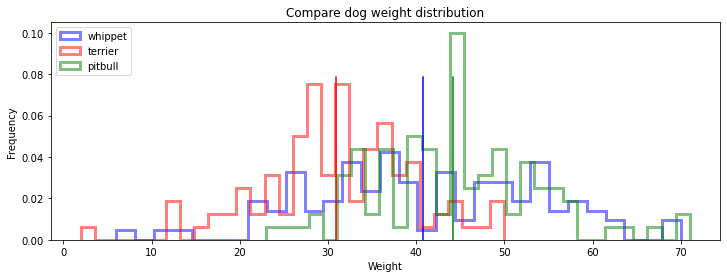

In [229]:
#plot weight histogram here
plt.figure(figsize=(12,4))

plt.hist(whippet_weight, histtype='step', density=True, label='whippet', color='blue', linewidth=3, alpha=.5, bins=30)
plt.axvline(np.mean(whippet_weight), ymax=.75, color='blue')

# plt.hist(norm1, histtype='step', density=True, label='norm_1', color='blue', alpha=.2, bins=1000)
# plt.hist(norm1, density=True, label='norm_1', color='blue', alpha=.2, bins=1000)

plt.hist(terrier_weight, histtype='step', density=True, label='terrier', color='red', linewidth=3, alpha=.5, bins=30)
plt.axvline(np.mean(terrier_weight), ymax=.75, color='red')

# plt.hist(norm2, histtype='step', density=True, label='norm_1', color='red', alpha=.2, bins=1000)
# plt.hist(norm2, density=True, label='norm_1', color='red', alpha=.2, bins=1000)

plt.hist(pitbull_weight, histtype='step', density=True, label='pitbull', color='green', linewidth=3, alpha=.5, bins=30)
plt.axvline(np.mean(pitbull_weight), ymax=.75, color='green')

plt.title('Compare dog weight distribution')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.legend()

plt.show()


In [230]:
# 11. Dog colors
poodle_colors = fetchmaker.get_color('poodle')
shihtzu_colors = fetchmaker.get_color('shihtzu')
poodle_colors

300    black
301    black
302    black
303    black
304    black
       ...  
395    white
396    white
397    white
398    white
399    white
Name: color, Length: 100, dtype: object

In [234]:
# 12 Count brown poodles
colors = ['black', 'brown', 'gold', 'grey']
f = lambda x: [np.count_nonzero(x == c) for c in colors]
color_table = [f(poodle_colors), f(shihtzu_colors)] 
print(color_table)

                            

[[17, 13, 8, 52], [10, 36, 6, 41]]


In [236]:
chi2, pval, dof, expected = chi2_contingency(color_table)
print('pval: {}'.format(pval))

pval: 0.002705203652485496


In [237]:
if pval<=0.05:
    print('Reject hypothesis that Poodles and Shihtzus have the same distribution of colors')
else:
    print('Poodles and SHitzus have the same variation of colors')

Reject hypothesis that Poodles and Shihtzus have the same distribution of colors


### Introduction to Sample Size and A/B Testing
One of the first steps to designing a successful experiment is determining the number of samples that you need in order to have confidence in the results. We don’t want to go through the trouble of running an A/B test or administering a survey only to discover that we don’t have enough information to make a good decision.

For instance, if we asked 5 people who they were voting for in an election, that small sample size would not be sufficient to predict the election results.

In this lesson we’ll cover two common types of experiment and their methods of sample size determination:

A/B Tests
Surveys
Online sample size calculators are available for both of these scenarios. These calculators will require quantities like “baseline conversion rate” or “population size”, but it’s not always obvious what these should be for a specific experiment. We’ll be covering that and more in this lesson.

1. We’ve included an A/B testing sample size calculator in the workspace. Can you find out what the sample size would be to detect at least a 30% increase from a 20% baseline with 90% statistical significance? Save the results in the variable called sample_size.

I couldn't guess what they meant. The calculator allows you to adjust basline conversion rate, statistical significance and minimum detectable effect.

I set statistical significance = 90%. Easy.
Baseline conversion rate is the rate at people who arrive at a web site participate as desired. In this case it is the starting position 20%. 
The 3rd thing to change is the minimum detectable effect. A 30% increase from a 20% baseline can be interpreted several ways. 1) an increase to 30% from 20% 2) an increase to 130% of baseline 3) Or (NewBaseline-Baseline)/Baseline = 30%  

Turns out 1) was the desired answer since the desired sample size was 760.


### A/B Testing: Understanding the Baseline
A/B tests compare an option that we’re currently using to a new option that we suspect might be better. In order to compare the two options, we need a metric. Generally, our metric will be the percent of users who take a certain action after interacting with one of our options. For instance:

- The percent of customers who buy a t-shirt after visiting one of two versions of a website
- The percent of users who click on one of two versions of an ad
- The percent of readers who open an email with one of two subject lines

In order to calculate the sample size for our A/B test, we need to know whether we expect our metric to be low or high. It will take more samples to be able to spot a difference when our metric is extremely low or extremely high. Our initial estimate of our metric is called a baseline.

We can usually calculate a baseline by looking at historical data for the option that we’re currently using.

In [240]:
# Find the size of both of these lists
number_of_site_visitors = 2000.0
number_of_converted_visitors = 1300.0

# Calculate the conversion rate in terms of the above two variables here

conversion_rate = number_of_converted_visitors/number_of_site_visitors
print(f'conversion_rate is {conversion_rate}')

conversion_rate is 0.65


### A/B Testing: Determining Lift
We’re running an A/B Test in order to know if Option B is better than Option A but if Option B were only a tiny percent better, would we really care? In order to detect precise differences, we need a very large sample size. In order to choose a sample size, we need to know the smallest difference that we actually care to measure. This “smallest difference” is called lift.

Lift is generally expressed as a percent of the baseline conversion rate. Suppose that 6% of our customers currently buy socks on our website Sock Hops (that’s our baseline conversion rate). We think that a new website layout would increase this. Changing a website layout is hard, so we only think that it’s worth doing if at least 8% of our customers would buy socks on Sock Hops with the new layout. That means that we want to increase our conversions by 2%. 

Lift = 100* (new_conversion_rate - old_conversion_rate_before)/old_conversion_rate

1. From 8%, calculate what lift you would need to get to 12%. Save that number into a variable called lift_eight_percent_to_twelve_percent.

In [241]:
lift = lambda old,new: 100*(new-old)/old

lift_eight_percent_to_twelve_percent = lift(8., 12.)
print(lift_eight_percent_to_twelve_percent)

50.0


From 10%, calculate what a 50% increase would be. Save that number into a variable called ten_percent_up_fifty_percent.

In [242]:
ten_percent_up_fifty_percent = 15.
print(ten_percent_up_fifty_percent)

15.0


### A/B Testing: Don't Interfere With Your Tests
Brian the Product Manager has been running an A/B Test for a redesign of Viral Villanelle’s landing page. Brian used the principles in the Sample Size Determination course on Codecademy to calculate a sample size. He needs 1,100 users to view each variant of the landing page in order to be able to detect his desired lift. When he reaches a total of 2,200 visits to both variants, he runs a Chi-Square test. The new website design performs slightly better, but the results are not statistically significant. Brian decides to run the test for another week to see if he can get to significance. He really wants to launch the redesigned website and he needs statistical validation to show to his boss.

Brian has made a big mistake! By choosing to extend the A/B test past the sample size he needs, he introduces personal bias to the results of the test.

If the results had already been significant, he wouldn’t have run the test any longer. If he continues this pattern of preferentially extending the test when he wants a different answer, he will be more likely to get the results he wants, regardless if these desired results reflect reality.

It’s sad, but Brian will need to accept that the redesigned website isn’t significantly better than the original website.

Here are two important rules for making sure that A/B tests remain unbiased:

- Don’t continue to run the test after the predetermined sample size, until “significant” results are found.
- Don’t stop a test before reaching the predetermined sample size, just because your results reach significance early (unless there are ethical reasons that require you to stop, like a prescription drug trial).

Test data is sensitive to changes in sample size, which is why it is important to calculate beforehand.

Inspect the graph in the workspace. It shows an A/B Test where the baseline was 5%, and we want to see a lift of 50% (i.e., we want our second option to have at least a 7.5% conversion rate). A sample size calculator tells us that we need 210 samples. The chart shows the cumulative conversion rate after each new sample. When we reach our desired 210 samples, our cumulative conversion rate is slightly higher than 5%, but the difference is not significantly different (indicated by red). By extending the experiment to 320 samples, the difference becomes significantly different (indicated by green). We might conclude that our results are significant if we stopped the experiment at this point. However, we can see this is a temporary fluctuation. After this brief moment of “significance” the conversion rate decreases and our results become insignificant again. By arbitrarily extending the study until it reaches significance, we fool ourselves!

Try this: Flip a coin five times. Which side came up more frequently? Perhaps you now suspect that the coin is biased. Keep flipping the coin until that side shows up even more frequently. By changing your sample size in the middle of an experiment, you can easily convince yourself that a fair coin is biased.

Is this because with more sampling the chance of seeing a rare event increases. For example, flipping a coin. 6 heads in a row is an event withpval<=0.05, evidence to reject hypothesis that a coin id unfair. It will occur eventually of the expt is continued, entering the 5% unlikely zone.

### A/B Testing: Splitting a Test
Viral Villanelle’s social media presence drives visits to its website. Product Manager Brian wants to test a new ad. Using a sample size calculator, he finds that he will need a sample size of 1,100. Viral Villanelle’s current advertisement is shown to 500 users per day. What’s the best way for Brian to get his desired sample size?

It’s important to remember that Brian will need to show both the old and the new ad to 1,100 users each. If Brian wants to complete this test as quickly as possible, he could randomly divide users into two groups: half of users would see the old ad and half would see the new ad. It would take a little more than 4 days for 2,200 users to see one of the two ads.

What if Brian doesn’t want to divide Viral Villanelle’s audience evenly? If Brian is running many different types of A/B tests, he might not want to expose users to a barrage of different tests. Maybe only 10% of users should be shown the new ad, in case it performs terribly. By doing this, he would only be getting 50 users per day towards the 1,100 users that need to see the new ad. In this case, he would need to wait for 22 days (1100 / 50 = 22) in order to get his results, even though he would have gotten the 1,100 views for the old ad 3 days into the experiment.

For his final analysis, Brian should use all of the data from the 22 days. The Chi-Square test will correctly take into account that there is more data from the original ad than from the new ad.

1. Here at the Viral Villanelle, we found an amazing video of a hamster that appears to be rapping along to a chart-topping hip-hop song from 1979. We’ve been running it under the headline This Hamster Gets On The Microphone And What Happens Next Will Amaze You. This is reliably seen by 350 users daily. We are curious to see if our new headline Hamster’s Delight: Watch This Fuzzy Friend’s Rhythm To The Boogie (The Beat) will perform much better.

There are concerns that this new headline will alienate the jaded millennial generation so we would like to hedge our bets in case our new version performs poorly. If we only show 20% of our users the new headline, how many days will it take for us to get a sample size of at least 910 for each headline? Save your results in the variable called hamster_headline_experiment_length.

### Margin of Error
What does it mean to have “enough” people for a survey? Generally, we are making sure that our results are within a margin of error of the correct answer.

The margin of error is the furthest we expect the true value to be from what we measure in our survey. For example, let’s say we choose a margin of error of 4%. If we get results showing 40% of people love beets the most, we can be confident that the true proportion in the population lies somewhere between 36% and 44%. Thus, the smaller we make the margin of error, the more certainty we have in the results. The larger we make the margin of error, more uncertain we are that they represent the views of the total population.

In order to make our margin of error smaller, we will need a larger sample size.

### Population Size
Our sample should accurately represent the population as a whole. So, when we are dealing with a larger population, we should probably be sampling more people.

It is sometimes tricky to determine what the effective population size is. For example, suppose there are 200 people who currently visit BeetsMe regularly. Is 200 the population size for our vegetable survey?

If BeetsMe wants to appeal to the tourists that frequently visit Vancucumber, or if they ever want to launch an online store to ship healthy treats all over the world, the real population size is closer to 8 billion (or infinity, really, if we think about the number of humans who could eventually exist and have vegetable preferences). So, for experiments like this, we use the highest population size we can. Normally, 100,000 will suffice, as changes become negligible beyond that.

Often, for decisions that require extrapolation to an unknown customer base, it is important to understand the preferences of a typical person out in the world, whether or not they are part of your customer base right now. Generally, we use this larger population size of 100,000 or greater instead of focusing on the amount of current customers.

However, if the small town of Vancucumber is holding an election for a new mayor, and we want to project the results of the election, then the 1700 citizens would be the only important people. In this case, 1700 is the population size we would use in a sample size calculator.

1. You have a subscription service called Flow-etry, which sends customers a recording of a random poem being read rhythmically over a random beat once per day. There have been 100 cancellations in the past month, and 96 of them have answered a cancellation survey.

If you are conducting a survey about reasons for cancellation, what is a good choice for population size? Store your answer in a variable called flow_population.

In [ ]:
# Potential customers are much larger thN THE NUMBER OF CANCELLATIONS. aT 100000 the results havr converged.
flow_population = 100000

2. You are doing a company-wide survey to determine what the team-bonding outing should be for this quarter. The options are laser tag, bowling, and karaoke. The company has 643 employees.

What is the population size for this survey? Store your answer in a variable called outing_pop.

In [ ]:
# In this case there can pnly be 643 people invovled. If someone leave then it will get smaller.

outing_pop = 643

### Likely Sample Proportion
Often, before we conduct a survey, we have a guess of what we expect the results to be. This guess could be based upon the results from a previous survey, or perhaps the results of a small pilot study before the real study.

As the expected proportion of people with the desired trait decreases, we can survey fewer people. For example, if we are projecting election results and Candidate C has 1% of the voter base, taking a small sample of only 5 people might be fine, because it is very likely that no one we have chosen is voting for Candidate C. This is close enough to the true proportion.

As the expected proportion increases, it is rarer that we hit that proportion accurately with the random sample we choose.

If we do not have historical data, we normally use 50%, which gives the most conservative (i.e., largest required) sample size.

### Likely Sample Proportion
Often, before we conduct a survey, we have a guess of what we expect the results to be. This guess could be based upon the results from a previous survey, or perhaps the results of a small pilot study before the real study.

As the expected proportion of people with the desired trait decreases, we can survey fewer people. For example, if we are projecting election results and Candidate C has 1% of the voter base, taking a small sample of only 5 people might be fine, because it is very likely that no one we have chosen is voting for Candidate C. This is close enough to the true proportion.

As the expected proportion increases, it is rarer that we hit that proportion accurately with the random sample we choose.

If we do not have historical data, we normally use 50%, which gives the most conservative (i.e., largest required) sample size.

### Sample Size of a Survey
Once we determine appropriate values for the margin of error, confidence level, population size, and expected proportion values for our experiment, we can use a sample size calculator to determine the minimum sample size we need to survey to get the desired confidence in our answer.

Let’s put together what we’ve learned so far and determine the appropriate sample size for BeetsMe’s vegetable survey.

1. We are now conducting the survey to see if beets are the best vegetable to choose as a base for our new juice. Our product manager tells us that we want to be within 4% of the correct answer, with a 95% confidence level.

The town of Vancucumber is made up of 1700 people. We estimate that 40% of people think that the beet is the best vegetable.

Create variables margin_of_error, confidence_level, likely_proportion, and population_size. Store the values that will give you the most conservative sample size for this survey. For the percentages, use integers (e.g. 70% becomes 70).

In [2]:
margin_of_error = 4
confidence_level = 95
likely_proportion = 40
population_size = 100000  # We're still interested in wordwide sales, not just the towm

2. Enter the values you decided on for margin of error, confidence level, population size, and likely population proportion into the sample size calculator. What sample size do we need?

Store your answer in a variable called sample_size


In [3]:
# put the values in above panel and this is what the calculator said
sample_size = 573

3. You know that you get 600 customers into BeetsMe per week. We estimate that 20% (or 120) of them will answer the written survey that we hand them with their receipt. How many weeks will it take to get the appropriate number of survey responses?

In [5]:
nPeopleFillSurveyPerWeek = sample_size * 0.2
weeks_of_survey = sample_size / nPeopleFillSurveyPerWeek
print(weeks_of_survey)

5.0


### Differing Survey Results
Suppose we are going to survey a group of high school students to see what programming language they want to learn. In the survey, we give the students two choices: JavaScript or Python. This seems like a problem where we would use a Sample Size Survey Calculator.

But what if we don’t care about getting a specific margin of error? What if instead, we want to make a comparison: Are girls more likely to want to learn Python than boys are?

This survey is more similar to an A/B Test. Our baseline is the approximate percent of the population who want to learn Python, and our lift is the minimum difference between boys and girls that we want to be able to detect.

Whenever we want to make comparisons between subpopulations in our survey, we must use the A/B Test Calculator in order to get our desired survey size.



1. A local high school is having a battle of the bands because they can’t decide who should play the Junior/Senior dance. All the big names are going to give it a shot: The Secretariats, Frank & Stein’s Monsters, Bad Words, even Sour Candy. We suspect that Sour Candy is more popular with seniors than with juniors. In previous years, about 35% of students preferred Sour Candy. We’re worried about a difference of more than 14 percentage points (40% difference), and only need to be 85% sure of the significance. How many students should we invite to the battle of the bands in order to test our hypothesis? Save your answer to band_battle_sample_size.

In [ ]:
# The basline conversion rate is 35% ... the old value
# The ne rate is 40%
# Plug the numbers is with statistical significance = 85%
band_battle_saple_size = 170

### A/B Testing at Nosh Mish Mosh
The Nosh Mish Mosh is a recipe and ingredient meal delivery service. We ship the raw materials and you get to cook it at your home! We’ve decided to hire a data analyst to help them make product and interface decisions. Get started and we’ll be able to judge the amount of data we’ll need for these differences to be meaningful.

In [12]:
import noshmishmosh

1. Nosh Mish Mosh wants to run an experiment to see if we can convince more people to purchase meal plans if we use a more artisanal-looking vegetable selection. We’ve photographed these modern meals with blush tomatoes and graffiti eggplants, but aren’t sure if this strategy will sell enough units to benefit from establishing a business relationship with a new provider.

Before running this experiment, of course, we need to know how many people have to see the new assets. We don’t want customers seeing food that we won’t end up offering. Of course, there are three things we need to know before we determine that number.

- the Baseline
- the Minimum Detectable Effect
- and the Statistical Significance

Let’s get the ball rolling on finding those numbers! In order to get our baseline, we need to first know how many users visited the site. Let’s grab that logged information, which is stored in noshmishmosh.customer_visits. Assign that to a new variable called all_visitors

In [37]:
all_visitors = noshmishmosh.customer_visits
x = np.array(all_visitors)

Next we need to know how many visitors to the site ultimately end up buying a meal or set of meals from Nosh Mish Mosh. We have that information saved into purchasing_customers field on noshmishmosh. Save that information into a variable called paying_visitors.

In [39]:
np.version.version

'1.18.5'